## **Data-Driven Real Estate: Classifying properties based on investment potential**

   
**Data sources**:
 
- *Zillow, Datarade, Realtor, National Association of Realtors (NAR), U.S. Census Bureau.*

**Summary**:


- **Objective**: *The primary goal of this project is to create a Machine Learning Classifier that categorizes properties based on the Return On Investment (ROI), dividing them into three categories:*  

    - *'No investment potential (NIP)',*
    - *'Moderate investment potential (MIP)',*
    - *'High investment potencial (HIP)'.*

***ROI**: Return on investment, or ROI, is a mathematical formula that investors can use to evaluate their investments and judge how well a particular investment has performed compared to others.*

- **Exploratory Data Analysis (EDA)**:
    
    - *Collect and clean data on properties, including price, location, size and amenities, from sources like Zillow and Realtor.*

    - *Analyze the distribution of property values and investment trends by region and others variables.*

    - *Explore correlations between property features and ROI to identify the key determinants of investment potential.*

    - *Visualize trends and patterns in property investment returns across different geographical areas.*

- **Machine Learning approach**:

    - **Model development**: *Use classification algorithms (e.g., decision trees, random forests, logistic regression) to build the investment potential classifier.*

    - **Feature engineering**: *Create new variables that capture important aspects of property investment. These features are designed to enhance the model's ability to predict ROI by better representing the factors that influence property value.*

    - **Model evaluation**: *Assess model performance using metrics such as accuracy, precision, recall and F1 score to ensure reliable predictions.*

- **Potential impact**:
    - *This project aims to assist investors in identifying lucrative properties by providing data-driven insights into the investment potential of various real estate assets.*

    - *The classifier can help real estate professionals make informed decisions on property investments, ultimately improving portfolio performance.*

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

### 1. Load and visualisation of the dataset

In [87]:
# Loads the DataFrame we are going to work with.
housing_us = pd.read_csv("../data/real_estate_us.csv")

In [88]:
housing_us.head(10)

,property_id,state,city,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,mainroad_access,airconditioning,garage_parking,school_rating,walkability_score,preferred_area,tax_rate,maintenance_cost
0,1,California,San Diego,2638547.0,667.0,NaN,3.0,0.43,1955,12880.0,Yes,No,2.0,2.0,31.0,No,2.49,5711.0
1,2,Nevada,Henderson,1093731.0,965.0,4.0,4.0,3.24,1973,3857.0,Yes,Yes,0.0,6.0,10.0,Yes,2.58,6194.0
2,3,Texas,Dallas,849545.0,3218.0,5.0,2.0,4.59,1989,2901.0,No,No,1.0,3.0,79.0,Yes,0.55,6045.0
3,4,California,San Diego,1362633.0,2298.0,NaN,4.0,3.83,2001,3589.0,Yes,No,0.0,NaN,28.0,Yes,1.63,1001.0
4,5,Texas,Houston,950855.0,2612.0,4.0,2.0,2.93,2006,2342.0,Yes,No,3.0,3.0,20.0,No,0.67,2954.0
5,6,Arizona,Tucson,920073.0,2470.0,2.0,2.0,1.47,2018,4146.0,No,No,NaN,3.0,38.0,Yes,0.70,5610.0
6,7,California,San Diego,1380429.0,4368.0,2.0,1.0,2.04,1995,3572.0,No,Yes,1.0,2.0,32.0,No,0.76,4594.0
7,8,Arizona,Scottsdale,NaN,4592.0,5.0,3.0,0.19,2005,10045.0,No,No,0.0,2.0,6.0,Yes,2.00,3312.0
8,9,Georgia,Atlanta,1491201.0,3091.0,4.0,3.0,3.59,1998,6160.0,Yes,No,3.0,1.0,17.0,Yes,0.68,5579.0
9,10,Illinois,Chicago,702736.0,4761.0,NaN,4.0,1.17,2004,NaN,No,No,3.0,5.0,36.0,Yes,0.85,3418.0


In [89]:
housing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_id        15108 non-null  int64  
 1   state              15108 non-null  object 
 2   city               15108 non-null  object 
 3   price              14051 non-null  float64
 4   area_sqft          14051 non-null  float64
 5   bedrooms           14051 non-null  float64
 6   bathrooms          14051 non-null  float64
 7   lot_size_acres     15108 non-null  float64
 8   year_built         15108 non-null  int64  
 9   rental_income      14051 non-null  float64
 10  mainroad_access    15108 non-null  object 
 11  airconditioning    15108 non-null  object 
 12  garage_parking     14051 non-null  float64
 13  school_rating      14051 non-null  float64
 14  walkability_score  14051 non-null  float64
 15  preferred_area     15108 non-null  object 
 16  tax_rate           140

#### 1.1. Description of what each column of the dataset represents

|COLUMN|MEANING|DATA TYPE|NOTE|EXAMPLE|
|---|---|---|---|---|
|**property_id**|*Unique identifier for each property*|*Integer*|*Used only as a reference; irrelevant for modeling*||
|**state**|*The state within the United States where the property is located*|*Categorical*||*California, Texas*|
|**city**|*The specific city within the state where the property is located*|*Categorical*||*Los Angeles, Austin*|
|**price**|*Sale price of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$400,000, $1,200,000*|
|**area_sqft**|*The livable area of the property in square feet*|*Continuous numeric*|**Unit**: *Square feet (sqft)*|*2,000 sqft, 3,500 sqft*|
|**bedrooms**|*Total number of bedrooms in the property*|*Discrete numeric*||*2, 4*|
|**bathrooms**|*Total number of bathrooms in the property*|*Discrete numeric*|*Full bathrooms (including shower) count as 1, toilets without shower count 0.5*|*1, 2.5*|
|**lot_size_acres**|*The size of the lot, in acres, on which the property is built*|*Continuous numeric*|**Unit**: *Acres. 1 acre = 43560 sqft*|*0.25, 1.5*|
|**year_built**|*The year the property was constructed*|*Integer*||*1995, 2010*|
|**rental_income**|*Estimated monthly rental income from the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$1,500, $3,200*|
|**mainroad_access**|*Indicates whether the property has direct access to a main road*|*Binary categorical*||*Yes, No*|
|**airconditioning**|*Indicates whether the property is equipped with an air conditioning system*|*Binary categorical*||*Yes, No*|
|**garage_parking**|*Number of parking spaces available in the garage*|*Discrete numeric*||*0, 2*|
|**school_rating**|*Average rating of nearby schools*|*Discrete numeric*|*From 1 (worst) to 10 (best)*|*5, 9*|
|**walkability_score**|*Walkability score, indicating how close essential services are*|*Discrete numeric*|*From 1 (low accessibility) to 100 (high accessibility)*|*70, 85*|
|**preferred_area**|*Indicates whether the property is located in a preferred or high-demand area*|*Binary categorical*||*Yes, No*|
|**tax_rate**|*Property tax rate*|*Continuous numeric*|**Unit**: *Percentage (%)*|*1.2%, 2.5%*|
|**maintenance_cost**|*Estimated annual maintenance cost of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$2,000, $5,000*|

### 2. Train - Test split

*First of all we should split our data in two parts: Train and Test.*

In [90]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_us, test_size = 0.2, random_state = 42)

### 3. Exploratory Data Analysis (EDA)

*This process will be performed only on the training set in order not to 'contaminate' the test data and to treat that set as purely as possible.*

#### 3.1. Univariate analysis

In [91]:
df_typification = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
property_id,12086,100.0,int64
state,8,0.066192,object
city,32,0.264769,object
price,11205,92.710574,float64
area_sqft,4060,33.592586,float64
bedrooms,5,0.04137,float64
bathrooms,4,0.033096,float64
lot_size_acres,491,4.062552,float64
year_built,73,0.604005,int64
rental_income,5435,44.969386,float64


In [92]:
cat_cols = [
    'state',
    'city',
    'mainroad_access',
    'airconditioning',
    'preferred_area'
]

train_set[cat_cols].mode().T # Get the most common type of property.

,0
state,Nevada
city,Scottsdale
mainroad_access,No
airconditioning,Yes
preferred_area,Yes


In [93]:
train_set.price.describe().round(2)

count      11232.00
mean     1039277.05
std       910751.54
min       200595.00
25%       497502.25
50%       734876.00
75%      1173829.25
max      5939204.00
Name: price, dtype: float64

In [94]:
train_set.rental_income.describe().round(2)

count    11234.00
mean      3624.83
std       3372.61
min        424.00
25%       1643.00
50%       2539.50
75%       4191.00
max      28518.00
Name: rental_income, dtype: float64

In [95]:
train_set.maintenance_cost.describe().round(2)

count    11214.00
mean      4011.61
std       1725.78
min       1000.00
25%       2552.00
50%       4005.50
75%       5496.75
max       6999.00
Name: maintenance_cost, dtype: float64

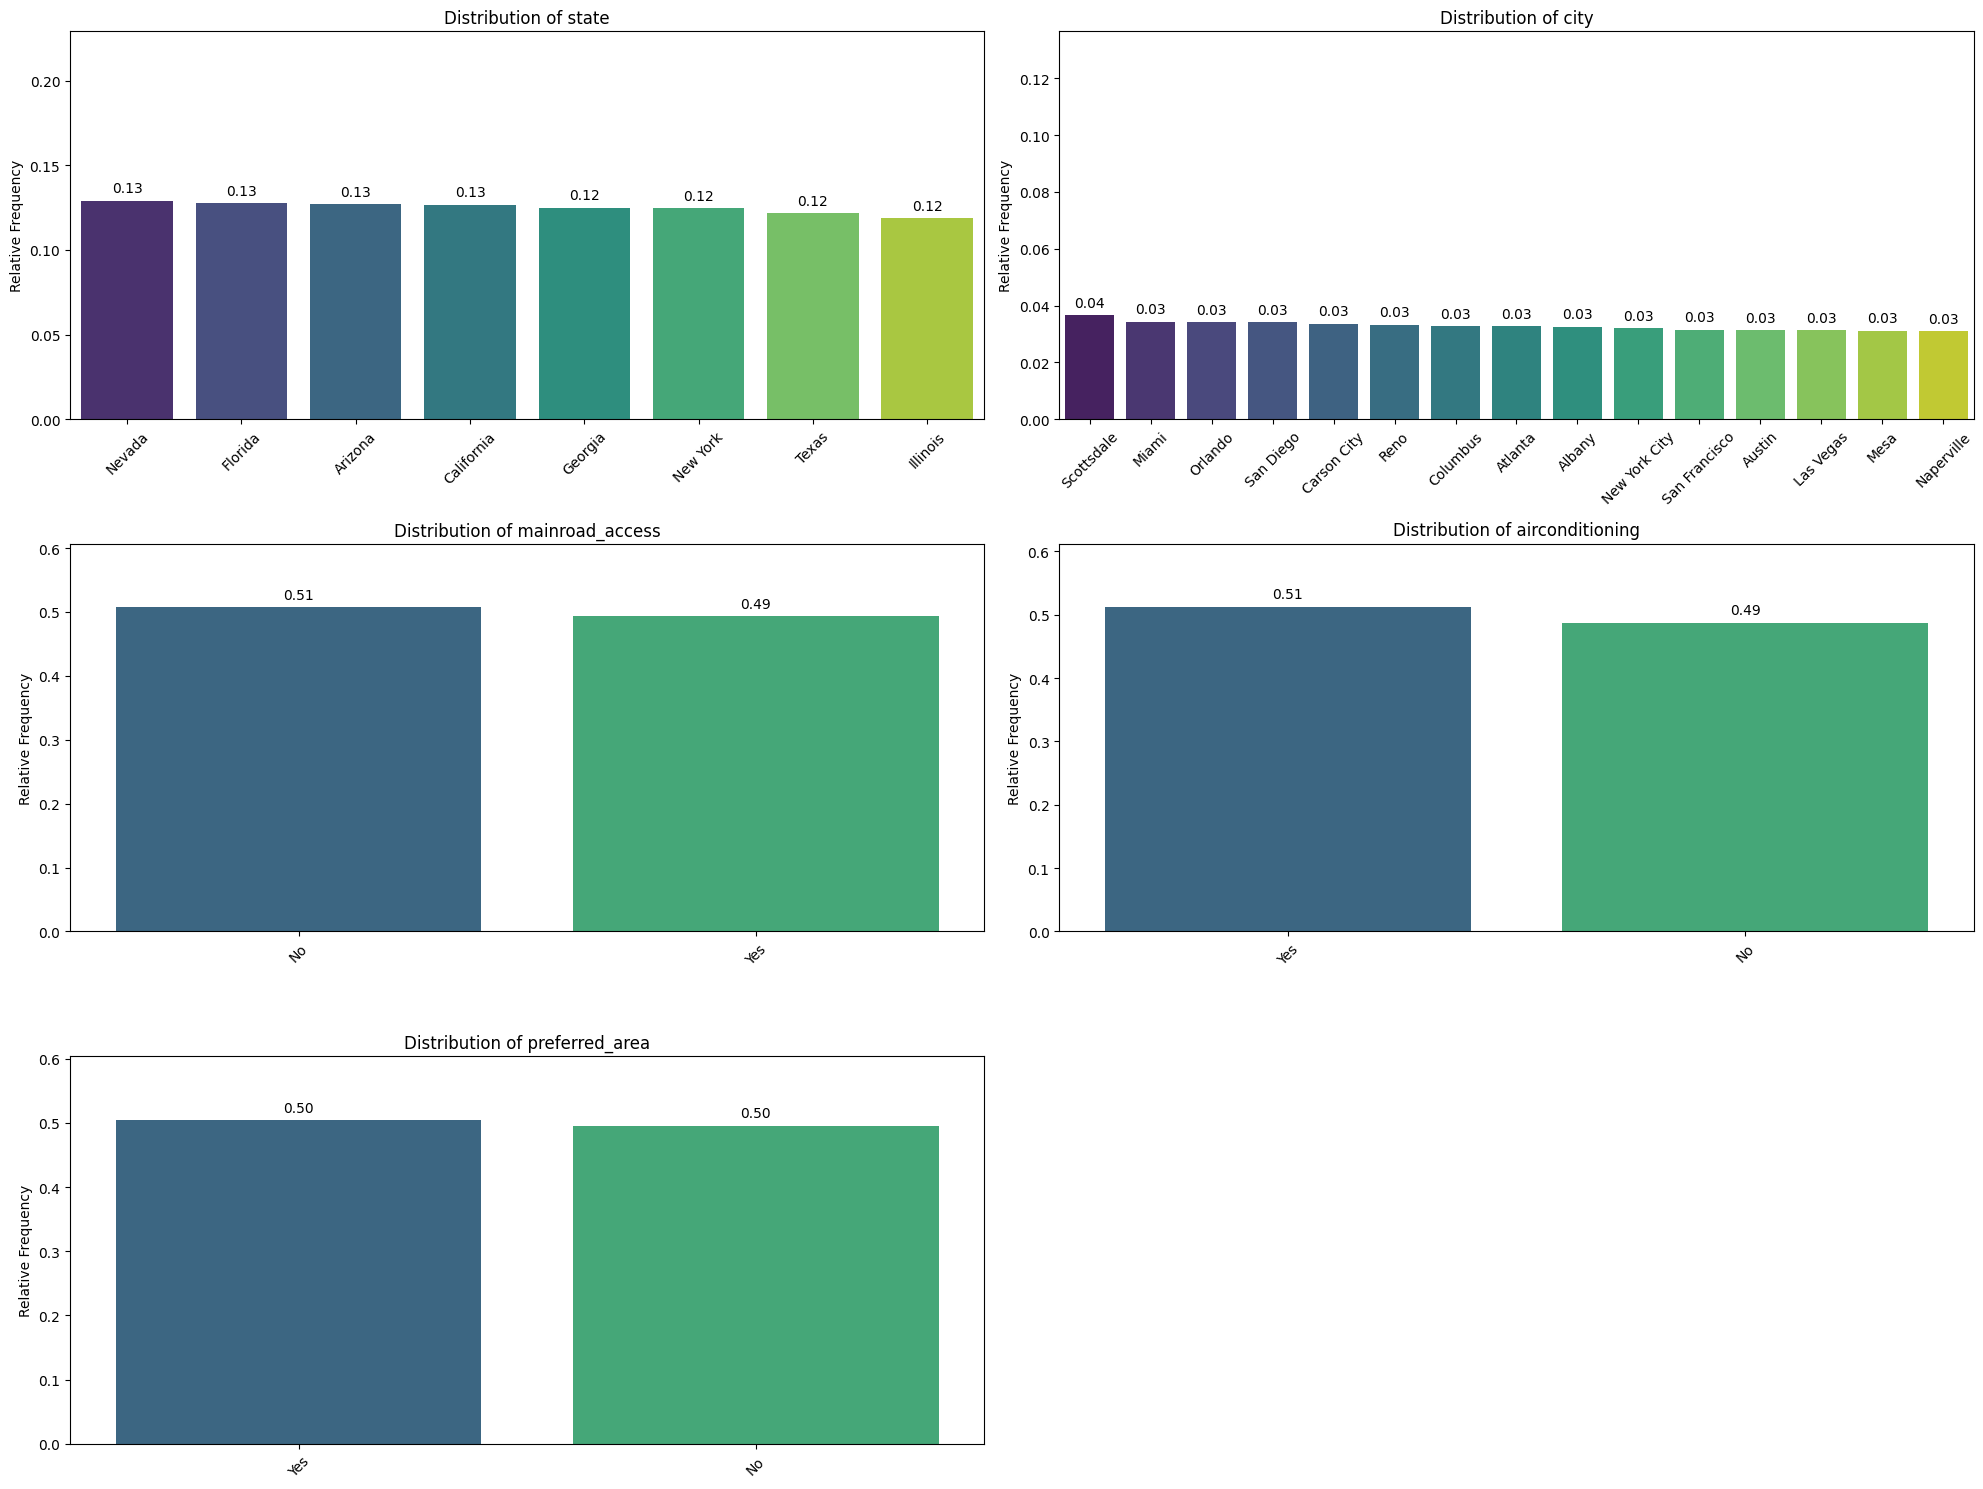

In [96]:
dpf.plot_categorical_distribution(train_set, cat_cols, relative = True, show_values = True, limit = 15)

*It seems to be quite balanced in terms of category features.*

(3, 2)


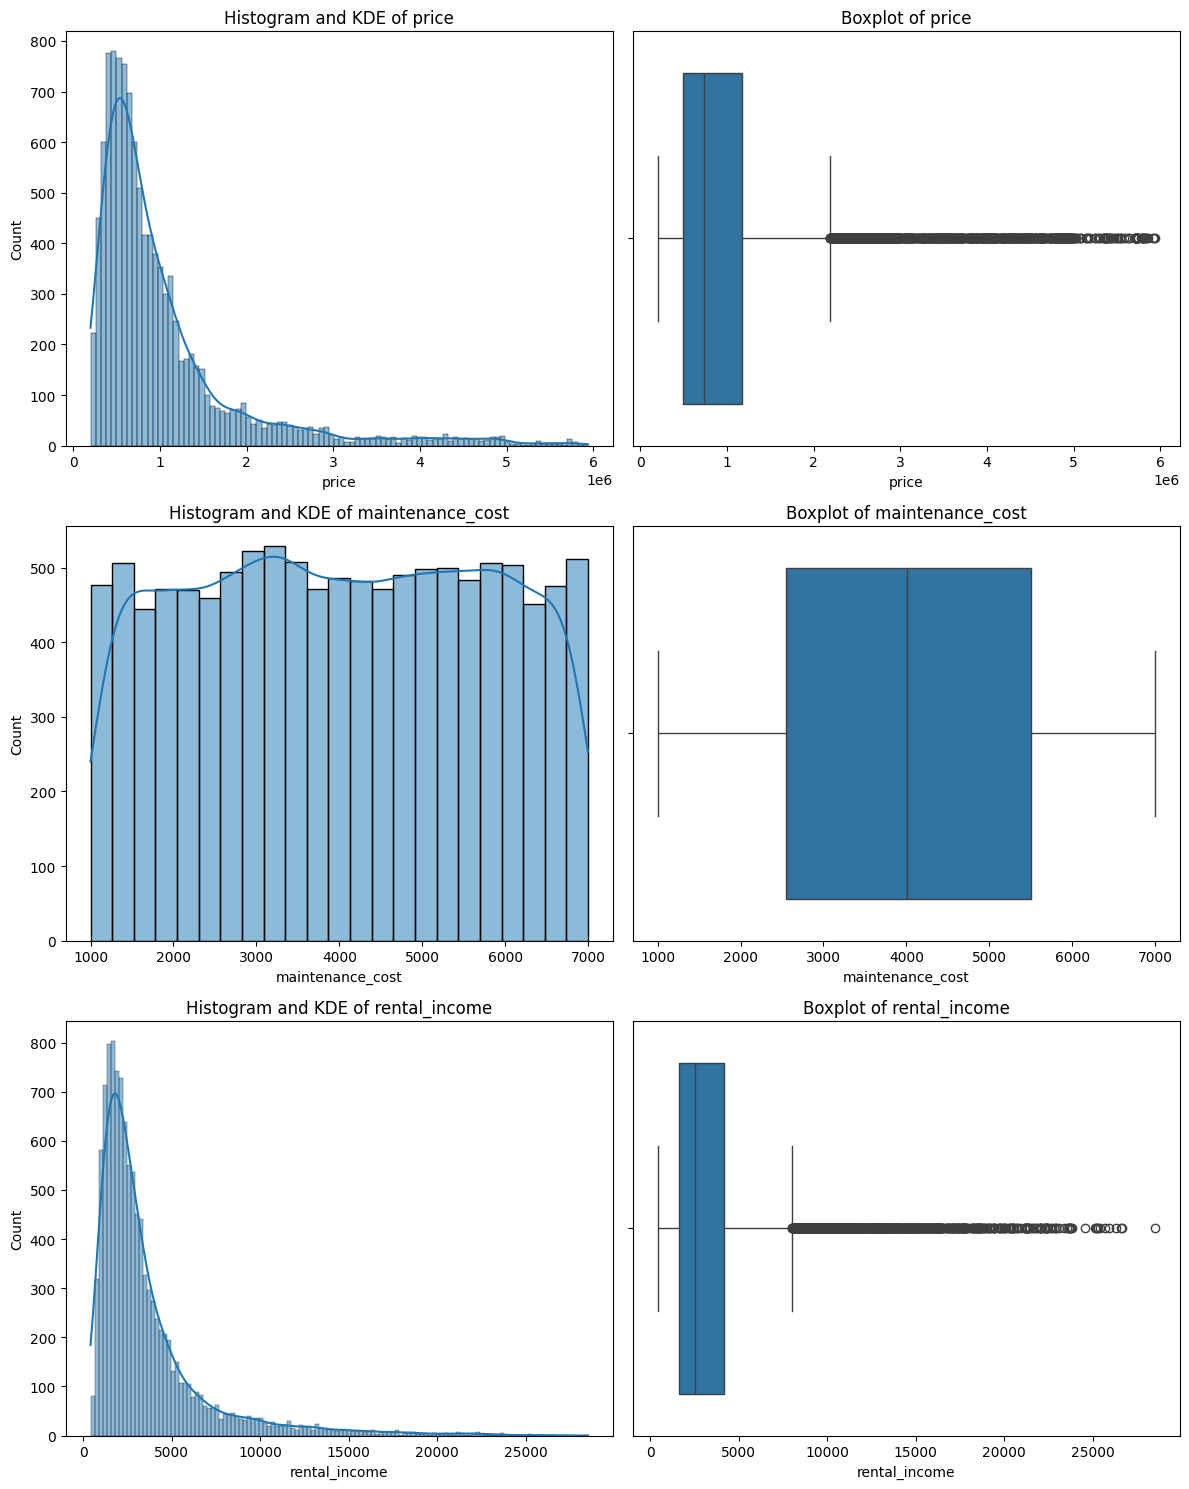

In [97]:
dpf.plot_combined_graphs(train_set, ['price', 'maintenance_cost', 'rental_income'])

### 4. Data preprocessing

*To continue with the study and thinking about the progress of it, I will create a new column to calculate ROI, on which our project will be based, and making it a supervised classification project.*

KeyError: 'investment_category'

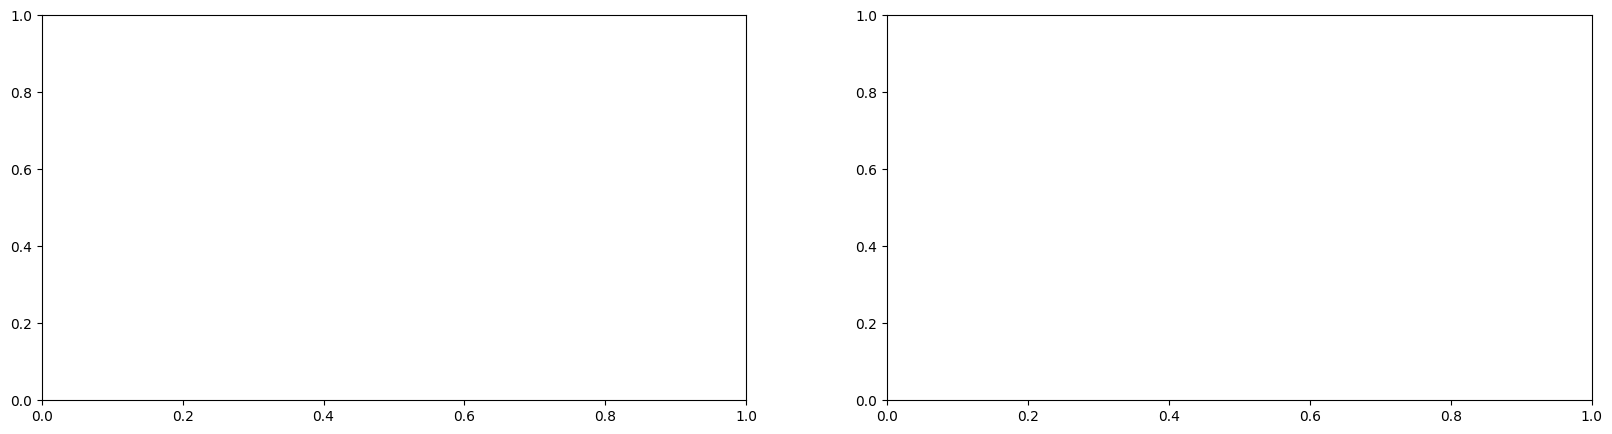

In [98]:
cat_cols = 'investment_category'
dpf.plot_categorical_distribution(housing_us, [cat_cols], relative = True)

*The dataset is a little unbalanced, but not too much, so we will continue with the process working with this data.*